## GReaT Example with California Housing Dataset

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [4]:
from examples.utils import set_logging_level
from be_great import GReaT

/data/guoquanjiang/envs/begreat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import matplotlib.pyplot as plt

In [6]:
logger = set_logging_level(logging.INFO)

### Load Data

In [7]:
data = datasets.fetch_california_housing(as_frame=True).frame
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

### Create GReaT Model

Only one epoch here for demonstration

In [8]:
great = GReaT("C:/Users/Windows 11/Desktop/Dissertation/Codes/models/iiBcai/gpt2",                         # Name of the large language model used (see HuggingFace for more options)
              epochs=100,                             # Number of epochs to train (only one epoch for demonstration)
              save_steps=2000,                      # Save model weights every x steps
              logging_steps=50,                     # Log the loss and learning rate every x steps
              experiment_dir="trainer_california",  # Name of the directory where all intermediate steps are saved
              batch_size=32
              #lr_scheduler_type="constant",        # Specify the learning rate scheduler 
              #learning_rate=5e-5                   # Set the inital learning rate
             )

### Start Training

In [9]:
trainer = great.fit(data)

2024-06-27 09:38:55,956 - INFO - Convert data into HuggingFace dataset object... (great.py:211)
2024-06-27 09:38:55,971 - INFO - Create GReaT Trainer... (great.py:216)
2024-06-27 09:38:57,215 - INFO - Start training... (great.py:232)
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [10]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 21609.9555,
 'train_samples_per_second': 95.512,
 'train_steps_per_second': 2.985,
 'total_flos': 9.3261037953024e+16,
 'train_loss': 1.0640284214463345,
 'epoch': 100.0,
 'step': 64500}

In [11]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

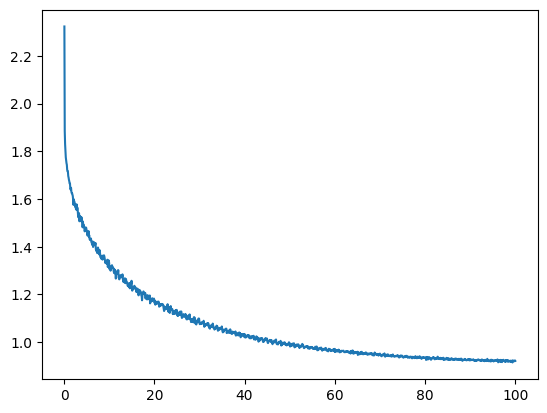

In [12]:
plt.plot(epochs, loss)

### Save Model

In [17]:
great.save("california")

/data/guoquanjiang/be_great/be_great/great.py:480: UserWarning: Directory california already exists and is overwritten now.
  warnings.warn(f"Directory {path} already exists and is overwritten now.")


### Load Model

In [ ]:
# great = GReaT.load_from_dir("california")

In [ ]:
great.load_finetuned_model("C:/Users/Windows 11/Desktop/Dissertation/Codes/models/california/california_distilgpt2_100.pt")

### Generate Samples

In [13]:
n_samples = 20640

In [14]:
samples = great.sample(n_samples, k=50, max_length=200)

  0%|          | 0/20640 [00:00<?, ?it/s]

20685it [05:30, 62.58it/s]                           


In [15]:
samples.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.0677      17.0  6.600000   1.000000      2516.0  2.888889     38.01   
1  3.4286      37.0  4.754902   0.926471      1894.0  5.423585     34.03   
2  2.9952      37.0  4.638298   1.000000       945.0  3.555556     37.68   
3  6.3767      15.0  5.791789   0.983051      1226.0  2.634154     38.66   
4  5.3922      34.0  6.326802   1.009317      1768.0  3.067227     34.18   

   Longitude  MedHouseVal  
0    -122.05        2.242  
1    -117.99        1.000  
2    -122.08        1.673  
3    -121.32        2.152  
4    -118.53        2.294

In [ ]:
samples.shape

In [16]:
samples.to_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/california_samples.csv",index=False)

: 

## Plot Data

Original Data

In [23]:
true_samples = data.sample(n = 1000)

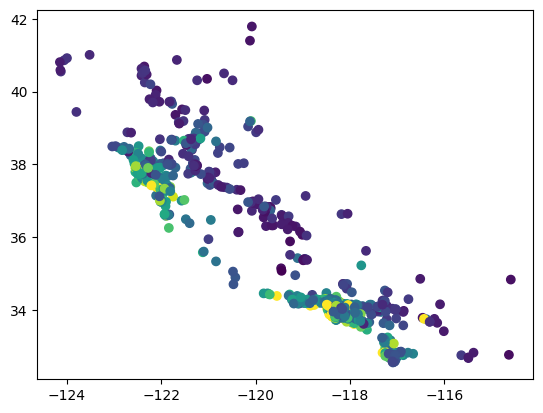

In [24]:
plt.scatter(true_samples["Longitude"], true_samples["Latitude"], c=true_samples["MedHouseVal"])

Generated samples

In [ ]:
#samples = pd.read_csv("california_samples.csv")

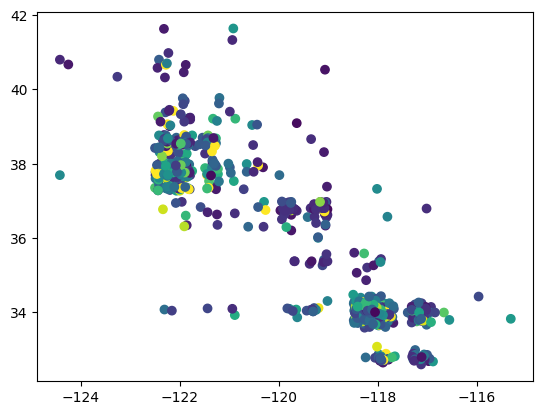

In [25]:
plt.scatter(samples["Longitude"], samples["Latitude"], c=samples["MedHouseVal"])